In [306]:
# Importing libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [276]:
# Importing Dataset

assignds = pd.read_csv("Placement_Data_Full_Class.csv")

In [277]:
# Setting the serial number column as index

assignds.set_index('sl_no', inplace = True)
assignds.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0


In [278]:
# Dimensions of the dataframe

assignds.shape

(215, 14)

In [317]:
# General information of the dataframe

assignds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 215
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          214 non-null    object 
 1   ssc_p           214 non-null    float64
 2   ssc_b           214 non-null    object 
 3   hsc_p           214 non-null    float64
 4   hsc_b           214 non-null    object 
 5   hsc_s           214 non-null    object 
 6   degree_p        214 non-null    float64
 7   degree_t        214 non-null    object 
 8   workex          214 non-null    object 
 9   etest_p         214 non-null    float64
 10  specialisation  214 non-null    object 
 11  mba_p           214 non-null    float64
 12  status          214 non-null    object 
dtypes: float64(5), object(8)
memory usage: 23.4+ KB


In [281]:
# Removing the Salary column since its can not be a predictor as it is only for placed people

assignds.drop(['salary'],axis = 1,inplace = True)

In [282]:
# Checking for NA values

assignds.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [283]:
# Summary of Numerical variables

numerical_var = assignds.select_dtypes(include = 'float64')
numerical_var.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [284]:
# Detecting Outliers

from scipy import stats
z = np.abs(stats.zscore(numerical_var))
print(z)
z.shape

[[0.02808697 2.2688123  1.14010225 1.29109087 0.59764672]
 [1.11336869 1.10344799 1.51326671 1.08715679 0.6876202 ]
 [0.21323793 0.15331275 0.32284282 0.21890765 0.76947385]
 ...
 [0.02808697 0.06133451 0.90304633 0.98909117 1.27870553]
 [0.61994138 0.03064373 1.14010225 0.15859198 0.35193393]
 [0.49096436 0.76646966 1.82115177 1.27590661 0.3536522 ]]


(215, 5)

In [285]:
# Print outliers
print(np.where(abs(z)>3))

# Remove Outliers
assignds.drop(197,inplace = True)



(array([197], dtype=int64), array([2], dtype=int64))


In [254]:
assignds.shape

(214, 13)

In [286]:
assignds_orig = assignds.copy()
assignds_orig.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
sl_no,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed
7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed
8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed
9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed


In [256]:
# One Hot Encoding the categorical columns with integer values

for col in assignds.select_dtypes(include='object').columns:
    n = len(assignds[col].unique())
    if (n == 2):
        assignds[col] = pd.get_dummies(assignds[col], drop_first=True)
        
assignds = pd.get_dummies(assignds)

In [257]:
assignds

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
sl_no,,,,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
4,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,0,1,0,1,0,0
212,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,1,0,0,1,0,0,1
213,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,1,0,1,0,1,0,0


In [258]:
# Counts of Target variable

assignds['status'].value_counts()


1    147
0     67
Name: status, dtype: int64

In [259]:
# Scaling of the numerical descriptive variables

from sklearn import preprocessing

assignds_scaled = preprocessing.MinMaxScaler().fit_transform(assignds)
assignds_scaled


array([[1.        , 0.53823954, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.79241394, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.49701093, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.53823954, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.68253968, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.43516801, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [260]:
# Converting the numpy array to Dataframe

assignds_scaled = pd.DataFrame(assignds_scaled, columns = assignds.columns)
assignds_scaled.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1.0,0.538240,1.0,0.889621,1.0,0.195122,0.0,0.104167,1.0,0.284483,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.792414,0.0,0.680890,1.0,0.670244,1.0,0.760417,0.0,0.564843,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.497011,0.0,0.510708,0.0,0.341463,0.0,0.520833,0.0,0.247001,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.311482,0.0,0.247117,0.0,0.048780,0.0,0.333333,1.0,0.308096,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.925788,0.0,0.602965,0.0,0.568293,0.0,0.975000,0.0,0.160795,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5,1.0,0.290868,1.0,0.210873,1.0,0.420732,1.0,0.104167,0.0,0.013868,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,0.0,0.105339,1.0,0.200988,1.0,0.707317,0.0,0.505833,0.0,0.077961,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,1.0,0.847454,0.0,0.444811,0.0,0.390244,1.0,0.354167,0.0,0.409670,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,1.0,0.661925,0.0,0.691928,0.0,0.536585,0.0,0.861250,0.0,0.377811,1.0,0.0,1.0,0.0,1.0,0.0,0.0
9,1.0,0.352711,0.0,0.543657,0.0,0.268293,0.0,0.083333,0.0,0.037481,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [261]:
# Summary of all values after scaling of variables

assignds_scaled.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.644860,0.544041,0.457944,0.483505,0.607477,0.398004,0.341121,0.459854,0.443925,0.416215,0.686916,0.051402,0.528037,0.420561,0.677570,0.051402,0.271028
std,0.479678,0.223620,0.499396,0.179912,0.489457,0.178934,0.475198,0.277102,0.498011,0.218234,0.464836,0.221334,0.500384,0.494807,0.468502,0.221334,0.445533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.404247,0.000000,0.392916,0.000000,0.268293,0.000000,0.208333,0.000000,0.256372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.538240,0.000000,0.461285,1.000000,0.390244,0.000000,0.427083,0.000000,0.407046,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.720676,1.000000,0.593081,1.000000,0.536585,1.000000,0.703125,1.000000,0.564374,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [262]:
#filtering the dataset to analyse the placed people

assignds_filter = assignds_orig.loc[assignds_orig['status'] == 'Placed']
assignds_filter.shape

(147, 13)

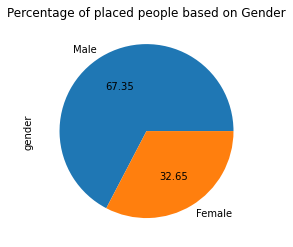

In [266]:
# Visualization
# Univariate

assignds_filter['gender'].value_counts().plot(kind='pie',autopct='%.2f',labels = ["Male","Female"])
plt.title('Percentage of placed people based on Gender')
plt.show()


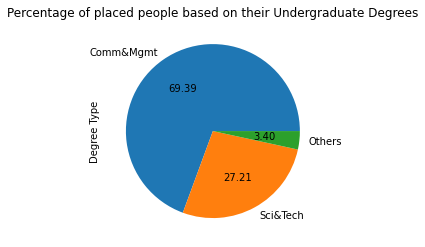

In [267]:
assignds_filter['degree_t'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Percentage of placed people based on their Undergraduate Degrees')
plt.ylabel("Degree Type")
plt.show()

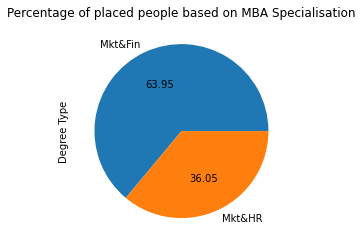

In [268]:
assignds_filter['specialisation'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Percentage of placed people based on MBA Specialisation')
plt.ylabel("Degree Type")
plt.show()

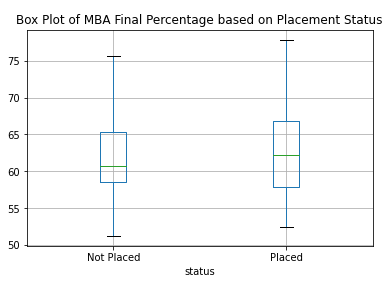

In [287]:
# Bivariate Visualisation

assignds_orig.boxplot(column='mba_p',by='status')
plt.title("Box Plot of MBA Final Percentage based on Placement Status")
plt.suptitle(' ')
plt.show()

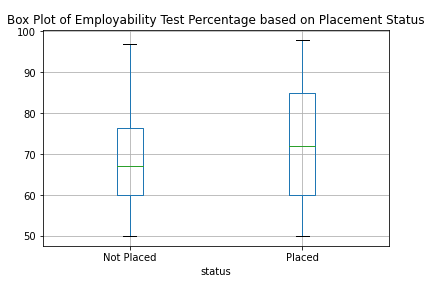

In [288]:
assignds_orig.boxplot(column='etest_p',by='status')
plt.title("Box Plot of Employability Test Percentage based on Placement Status")
plt.suptitle(' ')
plt.show()

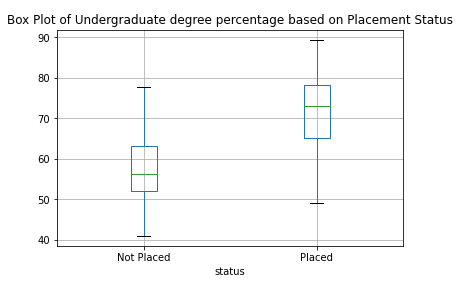

In [291]:
assignds_orig.boxplot(column='ssc_p',by='status')
plt.title("Box Plot of Secondary Education percentage based on Placement Status")
plt.suptitle(' ')
plt.show()

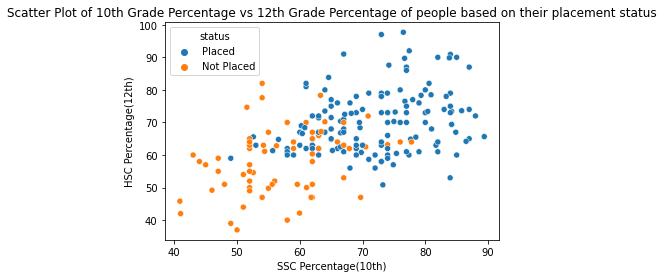

In [312]:
# Trivariate Visualization

sns.scatterplot('ssc_p', 'hsc_p', data=assignds_orig, hue='status')
plt.title("Scatter Plot of 10th Grade Percentage vs 12th Grade Percentage of people based on their placement status")
plt.xlabel("SSC Percentage(10th)")
plt.ylabel("HSC Percentage(12th)")
plt.show()

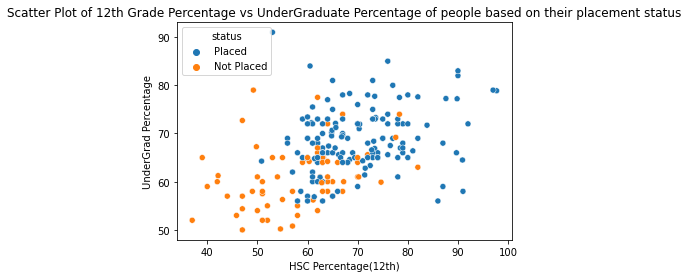

In [313]:
sns.scatterplot('hsc_p', 'degree_p', data=assignds_orig, hue='status')
plt.title("Scatter Plot of 12th Grade Percentage vs UnderGraduate Percentage of people based on their placement status")
plt.xlabel("HSC Percentage(12th)")
plt.ylabel("UnderGrad Percentage")
plt.show()

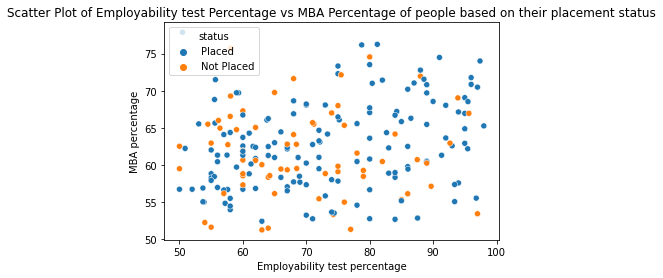

In [314]:
sns.scatterplot('etest_p', 'mba_p', data=assignds_orig, hue='status')
plt.title("Scatter Plot of Employability test Percentage vs MBA Percentage of people based on their placement status")
plt.xlabel("Employability test percentage")
plt.ylabel("MBA percentage")
plt.show()